In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import gc


# 폰트 설정
try:
    plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
except:
    try:
        plt.rcParams['font.family'] = 'NanumGothic'
    except:
        plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['axes.unicode_minus'] = False
fm._load_fontmanager(try_read_cache=False)


# 디바이스 설정
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device("mps") # 맥
elif torch.cuda.is_available():
    device = torch.device("cuda:0") # 윈도우
else:
    device = torch.device("cpu")


# 캐시 지우기 함수
def clean_cache():
    gc.collect()
    if torch.backends.mps.is_available() and torch.backends.mps.is_built():
        torch.mps.empty_cache()
    elif torch.cuda.is_available():
        torch.cuda.empty_cache()

Matplotlib is building the font cache; this may take a moment.


In [2]:
import glob

DATA_PATH = "./data"
TRAIN_NORMAL_PATHS = sorted(glob.glob("./data/train/NORMAL/*.jpeg"))
TRAIN_TARGET_PATHS = sorted(glob.glob("./data/train/PNEUMONIA/*.jpeg"))
VAL_NORMAL_PATHS = sorted(glob.glob("./data/val/NORMAL/*.jpeg"))
VAL_TARGET_PATHS = sorted(glob.glob("./data/val/PNEUMONIA/*.jpeg"))
TEST_NORMAL_PATHS = sorted(glob.glob("./data/test/NORMAL/*.jpeg"))
TEST_TARGET_PATHS = sorted(glob.glob("./data/test/PNEUMONIA/*.jpeg"))

PATHS_LIST = [TRAIN_NORMAL_PATHS, TRAIN_TARGET_PATHS, VAL_NORMAL_PATHS, VAL_TARGET_PATHS, TEST_NORMAL_PATHS, TEST_TARGET_PATHS]
PATHS_DICT = {"TRAIN NORMAL": TRAIN_NORMAL_PATHS,
              "TRAIN TARGET": TRAIN_TARGET_PATHS,
              "VAL NORMAL": VAL_NORMAL_PATHS,
              "VAL TARGET": VAL_TARGET_PATHS,
              "TEST NORMAL": TEST_NORMAL_PATHS,
              "TEST TARGET": TEST_TARGET_PATHS}

print("[데이터 개수]")
for name, path in PATHS_DICT.items():
    print(f"· {name}: {len(path)}개")

[데이터 개수]
· TRAIN NORMAL: 1341개
· TRAIN TARGET: 3875개
· VAL NORMAL: 8개
· VAL TARGET: 8개
· TEST NORMAL: 234개
· TEST TARGET: 390개


1. 사이즈 편차가 심하다.

2. 학습 데이터는 많다.

3. 검증 데이터 개수가 적다.

In [3]:
import os

all_folders = [set(os.listdir("./data/train/NORMAL")), 
                set(os.listdir("./data/train/PNEUMONIA")),
                set(os.listdir("./data/val/NORMAL")),
                set(os.listdir("./data/val/PNEUMONIA")),
                set(os.listdir("./data/test/NORMAL")),
                set(os.listdir("./data/test/PNEUMONIA"))]

count = 0
tmp_set = set()

for folder in all_folders:
    for file_name in folder:
        if ".jpeg" in file_name:
            tmp_set.add(file_name)
            count += 1

print(f"전체 중 중복 파일: {count - len(tmp_set)}개")

전체 중 중복 파일: 0개


In [4]:
import random
import torchvision

rand_index = random.randint(0, len(TRAIN_NORMAL_PATHS))

sample_normal_image = TRAIN_NORMAL_PATHS[rand_index]
sample_normal_image = torchvision.io.read_image(sample_normal_image)[0]

print(f"[샘플 이미지 정보]")
print(f"· 사이즈: {sample_normal_image.shape}")
print(f"· 클래스: {type(sample_normal_image)}")
print(f"· 데이터: {sample_normal_image.dtype}")

[샘플 이미지 정보]
· 사이즈: torch.Size([1063, 1388])
· 클래스: <class 'torch.Tensor'>
· 데이터: torch.uint8


- 텐서 타입

- uint8 타입

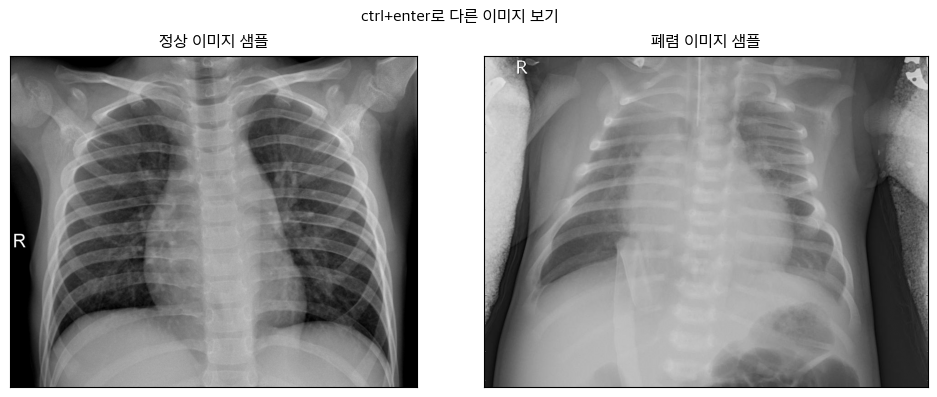

In [5]:
import torchvision
import matplotlib.pyplot as plt

rand_index = random.randint(0, len(TRAIN_NORMAL_PATHS))

sample_normal_image = TRAIN_NORMAL_PATHS[rand_index]
sample_target_image = TRAIN_TARGET_PATHS[rand_index]

sample_normal_image = torchvision.io.read_image(sample_normal_image)
sample_target_image = torchvision.io.read_image(sample_target_image)


# 축 숫자 표기 제거 함수 생성
def remove_ticks(columns=2):
    for num in range(columns):
        axes[num].set_xticks([])
        axes[num].set_yticks([])


# 샘플 이미지 출력
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
remove_ticks()

axes[0].imshow(sample_normal_image[0], cmap="gray")
axes[1].imshow(sample_target_image[0], cmap="gray")

fig.suptitle("ctrl+enter로 다른 이미지 보기")
axes[0].set_title("정상 이미지 샘플")
axes[1].set_title("폐렴 이미지 샘플")

plt.tight_layout()
plt.show()

- 폐렴 환자의 폐 부근이 전반적으로 더욱 뿌옇다는 사실을 알 수 있다.

- 사진 각각의 사이즈가 모두 다르다는 것을 알 수 있다. 이는 사전 학습 모델이 사이즈 조절을 하므로 그대로 진행한다.

In [6]:
# # 사이즈 편차 확인

# max_w = 0
# min_w = 10000000
# max_h = 0
# min_h = 10000000

# print("[사이즈 구성]")

# for name, PATH in PATHS_DICT.items():

#     size_set = set()
#     h_size_set = set()
#     w_size_set = set()

#     for image in PATH:
#         image = torchvision.io.read_image(image)[0]

#         size_set.add(image.shape)
#         h_size_set.add(image.shape[0])
#         w_size_set.add(image.shape[1])
    
#     print(f"· {name}: 총 {len(size_set)} 종류")
#     max_w = max(max_w, max(w_size_set))
#     max_h = max(max_h, max(h_size_set))
#     min_w = min(min_w, min(w_size_set))
#     min_h = min(min_h, min(h_size_set))

# print(f"(최대 W: {max_w}, 최소 W: {min_w}, 최대 H: {max_h}, 최소 H: {min_h})")

함수 선정

- 활성화 함수: 분류에 특화되어 있을 것. 일단 분류니까 시그모이드.

- 손실 함수: 0과 1 사이니까 MSE 또는 RMSLE. 혹은 크로스엔트로피(?)

현재 학습 데이터는 흑백의 1채널로, ResNet 모델의 3채널과 맞지 않으므로, 아래의 두 방향으로 진행한다.

1. 변환기와 conv1의 입력 채널을 3에서 1로 수정한다.

2. 학습 데이터를 3채널로 변환한다.

In [7]:
from torchvision.transforms import v2
from torchvision.transforms import InterpolationMode
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# device 설정
ch_1_device = device
ch_3_device = device


# 사전 학습 모델 설정(ResNet152)
ch_1_model = torchvision.models.resnet152(weights='IMAGENET1K_V1')
ch_3_model = torchvision.models.resnet152(weights='IMAGENET1K_V1')


# 기존 변환기 수정(3채널 -> 1채널)  * 참고 자료: https://docs.pytorch.org/vision/main/models/generated/torchvision.models.resnet152.html#torchvision.models.ResNet152_Weights
ch_1_transform = v2.Compose([
        v2.Grayscale(num_output_channels=1), # 입력 채널이 1개이므로 변경.
        v2.Resize(256, interpolation=InterpolationMode.BILINEAR),
        v2.CenterCrop(224),
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.449], # 기존 3채널 값의 평균값 활용
                     std=[0.226])])

ch_3_transform = torchvision.models.ResNet152_Weights.IMAGENET1K_V1.transforms()


# 데이터셋 설정
ch_1_train_dataset = ImageFolder(root = "./data/train", transform=ch_1_transform)
ch_3_train_dataset = ImageFolder(root = "./data/train", transform=ch_3_transform)

ch_1_val_dataset = ImageFolder(root = "./data/val", transform=ch_1_transform)
ch_3_val_dataset = ImageFolder(root = "./data/val", transform=ch_3_transform)

ch_1_test_dataset = ImageFolder(root = "./data/test", transform=ch_1_transform)
ch_3_test_dataset = ImageFolder(root = "./data/test", transform=ch_3_transform)


# 데이터 로더 설정
ch_1_train_dataloader = DataLoader(ch_1_train_dataset, batch_size=64, shuffle=True)
ch_3_train_dataloader = DataLoader(ch_3_train_dataset, batch_size=64, shuffle=True)

ch_1_val_dataloader = DataLoader(ch_1_val_dataset, batch_size=16, shuffle=False)
ch_3_val_dataloader = DataLoader(ch_3_val_dataset, batch_size=16, shuffle=False)

ch_1_test_dataloader = DataLoader(ch_1_test_dataset, batch_size=64, shuffle=False)
ch_3_test_dataloader = DataLoader(ch_3_test_dataset, batch_size=64, shuffle=False)

## 3채널 모델

In [8]:
# 모델의 주요 레이어 확인
print("[3채널 모델 주요 레이어]")

for n, (name, module) in enumerate(ch_3_model.named_children()):
    print(f"{n}) {name}: {module.__class__.__name__}")

# 입력과 출력층
print("\n[3채널 입력층과 출력층]")
print(f"· 입력층: {ch_3_model.conv1}")
print(f"· 출력층: {ch_3_model.fc}")

[3채널 모델 주요 레이어]
0) conv1: Conv2d
1) bn1: BatchNorm2d
2) relu: ReLU
3) maxpool: MaxPool2d
4) layer1: Sequential
5) layer2: Sequential
6) layer3: Sequential
7) layer4: Sequential
8) avgpool: AdaptiveAvgPool2d
9) fc: Linear

[3채널 입력층과 출력층]
· 입력층: Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
· 출력층: Linear(in_features=2048, out_features=1000, bias=True)


수정 사항

1. 데이터의 채널 1 -> 3: 기존 transform을 이용하면 자동으로 3채널로 변경된다. (완료)

2. 출력층의 클래스 개수 1000 -> 2

 conv1 → (1, 64, 112, 112)


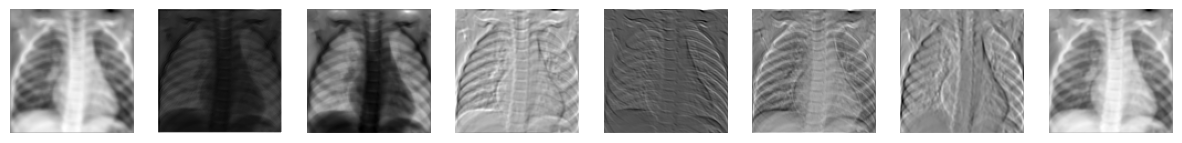

 layer1 → (1, 256, 112, 112)


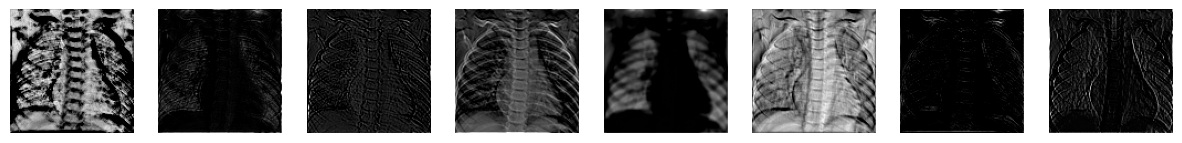

 layer2 → (1, 512, 56, 56)


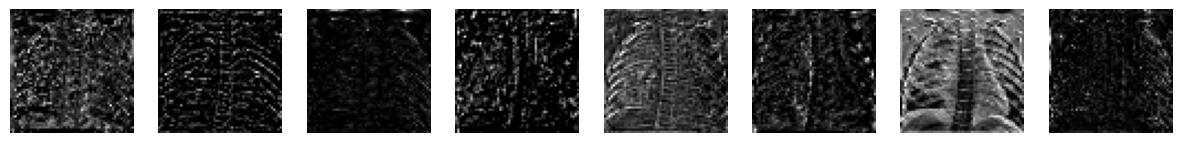

 layer3 → (1, 1024, 28, 28)


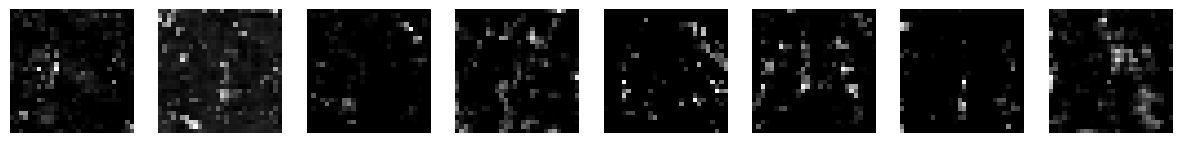

 layer4 → (1, 2048, 14, 14)


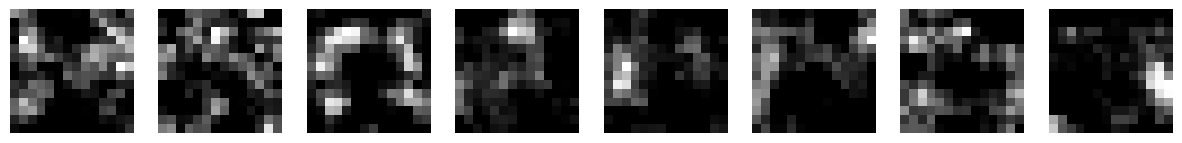

In [9]:
ch_3_sample_image = ch_3_train_dataset[0][0]

layers_dict = dict(ch_3_model.named_children())


def show_feature(name, out, max_channels=8):
    fmap = out.squeeze(0).detach().cpu()
    num = min(max_channels, fmap.shape[0])
    fig, axes = plt.subplots(1, num, figsize=(15,4))

    for i, ax in enumerate(axes if num>1 else [axes]):
        ax.imshow(fmap[i], cmap="gray")
        ax.axis("off")

    print(f" {name} → {tuple(out.shape)}")
    plt.show()


out = ch_3_transform(ch_3_sample_image).unsqueeze(0)
for layer in ["conv1", "layer1", "layer2","layer3","layer4"]:
    out = layers_dict[layer](out)
    show_feature(layer, out)

layer3부터 특징이 뚜렷하지 않으므로 재학습 시점으로 설정한다.

In [10]:
import torch.nn as nn
import torch.optim as optim

# 출력층 수정
in_features = ch_3_model.fc.in_features
ch_3_model.fc = nn.Linear(in_features=in_features, out_features=2) # 1000 -> 2


# 레이어 학습, 동결 구분
for name, param in ch_3_model.named_parameters():
    if name.startswith(("layer3", "layer4", "fc")):
        param.requires_grad = True
    else:
        param.requires_grad = False


# 디바이스
ch_3_model = ch_3_model.to(ch_3_device)

# 손실함수
ch_3_criterion = nn.CrossEntropyLoss()

# 옵티마이저 설정
ch_3_params_to_update=[]
for param in ch_3_model.parameters():
  if param.requires_grad:
    ch_3_params_to_update.append(param)

ch_3_optim = optim.Adam(ch_3_params_to_update, lr=0.0005)

In [12]:
num_epochs = 5

ch_3_train_losses, ch_3_val_losses, ch_3_test_losses = [], [], []
ch_3_train_accuracies, ch_3_val_accuracies, ch_3_test_accuracies = [], [], []

flag = False

for epoch in range(num_epochs):
    if flag == True:
        break


    ch_3_model.train()
    ch_3_train_loss = 0.0
    correct = 0
    total = 0

    for Xs, ys in ch_3_train_dataloader:
        
        Xs = Xs.to(ch_3_device)
        ys = ys.to(ch_3_device)

        y_preds = ch_3_model(Xs)
        loss = ch_3_criterion(y_preds, ys)
       
        ch_3_optim.zero_grad()
        loss.backward()
        ch_3_optim.step()

        ch_3_train_loss += loss.item()

        _, preds = torch.max(y_preds, 1) # 1은 dim을 의미. (value와 indice 반환)
        correct += (preds == ys).sum().item()
        total += ys.size(0)


    ch_3_epoch_train_loss = ch_3_train_loss / len(ch_3_train_dataloader)
    ch_3_epoch_train_acc = correct / total
    ch_3_train_losses.append(ch_3_epoch_train_loss)
    ch_3_train_accuracies.append(ch_3_epoch_train_acc)


    ch_3_model.eval()
    ch_3_val_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for Xs, ys in ch_3_val_dataloader:
            Xs = Xs.to(ch_3_device)
            ys = ys.to(ch_3_device)

            y_preds = ch_3_model(Xs)
            loss = ch_3_criterion(y_preds, ys)
            ch_3_val_loss += loss.item()
        
            _, preds = torch.max(y_preds, 1) # 1은 dim을 의미. (value와 indice 반환)
            correct += (preds == ys).sum().item()
            total += ys.size(0)

            ch_3_epoch_val_loss = ch_3_val_loss / len(ch_3_val_dataloader)
            ch_3_val_losses.append(ch_3_epoch_val_loss)
            
            ch_3_epoch_val_acc = correct / total
            ch_3_val_accuracies.append(ch_3_epoch_val_acc)
            
            if len(ch_3_val_losses) > 1:
                if ch_3_val_losses[-1] > ch_3_val_losses[-2]:
                    flag = True



# 추론
ch_3_model.eval()
ch_3_test_loss, correct, total = 0.0, 0, 0

with torch.no_grad():
    for Xs, ys in ch_3_test_dataloader:
        Xs, ys = Xs.to(device), ys.to(device)
        y_preds = ch_3_model(Xs)
        loss = ch_3_criterion(y_preds, ys)
        ch_3_test_loss += loss.item()

        _, preds = torch.max(y_preds, 1)
        correct += (preds == ys).sum().item()
        total += ys.size(0)

ch_3_epoch_test_loss = ch_3_test_loss / len(ch_3_test_dataloader)
ch_3_epoch_test_acc = correct / total
ch_3_test_losses.append(ch_3_epoch_test_loss)
ch_3_test_accuracies.append(ch_3_epoch_test_acc)

# -------------------
# Logging
# -------------------
print(f"[Epoch {epoch+1}] "
        f"Train Loss: {ch_3_epoch_train_loss:.4f} | "
        f"Train Acc: {ch_3_epoch_train_acc*100:.2f}% | "
        f"Test Loss: {ch_3_epoch_test_loss:.4f} | "
        f"Test Acc: {ch_3_epoch_test_acc*100:.2f}%")


[Epoch 4] Train Loss: 0.0263 | Train Acc: 99.04% | Test Loss: 1.3765 | Test Acc: 78.37%


## 1채널 모델

In [ ]:
# 모델의 주요 레이어 확인
print("[1채널 모델 주요 레이어]")

for n, (name, module) in enumerate(ch_1_model.named_children()):
    print(f"{n}) {name}: {module.__class__.__name__}")

# 입력과 출력층
print("\n[1채널 입력층과 출력층]")
print(f"· 입력층: {ch_1_model.conv1}")
print(f"· 출력층: {ch_1_model.fc}")

[1채널 모델 주요 레이어]
0) conv1: Conv2d
1) bn1: BatchNorm2d
2) relu: ReLU
3) maxpool: MaxPool2d
4) layer1: Sequential
5) layer2: Sequential
6) layer3: Sequential
7) layer4: Sequential
8) avgpool: AdaptiveAvgPool2d
9) fc: Linear

[1채널 입력층과 출력층]
· 입력층: Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
· 출력층: Linear(in_features=2048, out_features=2, bias=True)


In [ ]:
import torch.nn as nn

# 기존 conv1(입력 레이어)의 가중치(3채널)을 1채널화
old_weights = ch_1_model.conv1.weight.data
ch_1_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) # 시그모이드로 하는 건 여기가 아닌가?
with torch.no_grad():
    ch_1_model.conv1.weight.data = old_weights.mean(dim=1, keepdim=True)


# 출력층 수정:  클래스 개수에 맞게 fc 수정(0, 1)
in_features = ch_1_model.fc.in_features
ch_1_model.fc = nn.Linear(in_features=in_features, out_features=2)

 conv1 → (1, 64, 112, 112)


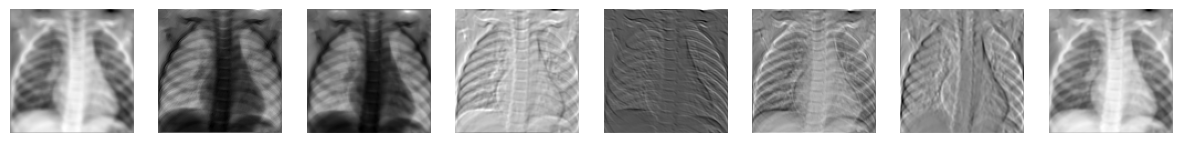

 layer1 → (1, 256, 112, 112)


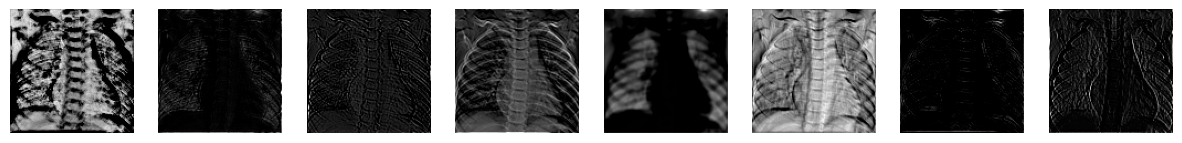

 layer2 → (1, 512, 56, 56)


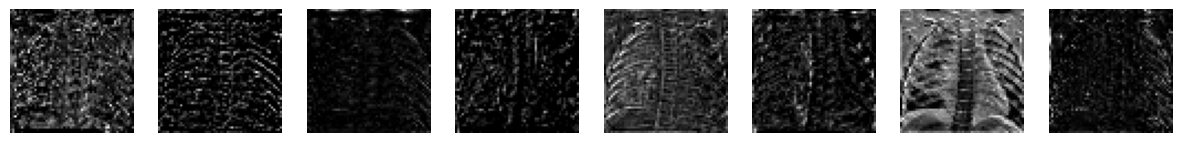

 layer3 → (1, 1024, 28, 28)


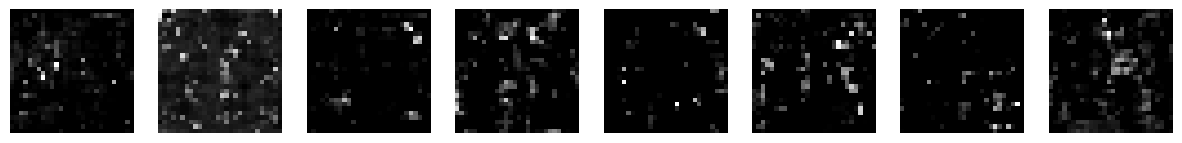

 layer4 → (1, 2048, 14, 14)


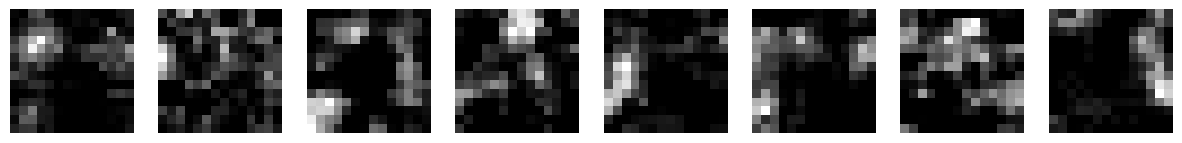

In [ ]:
# 샘플 이미지 통해 레이어 정하기
ch_1_sample_image = ch_1_train_dataset[0][0].to(ch_1_device)

x = ch_1_transform(ch_1_sample_image).unsqueeze(0)
layers = dict(ch_1_model.named_children())

out = x
for name in ["conv1", "layer1", "layer2","layer3","layer4"]:
    out = layers[name](out)
    show_feature(name, out)

동일하게 layer 2까지 쓰고, layer 3부터 재학습을 실시한다.

단, 기존의 입력층에 해당하는 conv2d의 입력 채널이 3에서 1로 바뀌었기 때문에 재학습이 필요하다.

In [ ]:
# 레이어 학습, 동결 구분
for name, param in ch_1_model.named_parameters():
    if name.startswith(( "conv1", "layer3", "layer4", "fc")): # conv1도 재학습 필요.
        param.requires_grad = True # 안 쓰겠다. 즉, 재학습시키겠다. 역전파에 참여시키겠다.
    else:
        param.requires_grad = False # 쓰겠다. 재학습시키지 않겠다. 역전파 시키지 않겠다.


# 디바이스
ch_1_model = ch_1_model.to(ch_1_device)

# 손실함수
ch_1_criterion = nn.CrossEntropyLoss()

# 옵티마이저 설정
ch_1_params_to_update=[]
for param in ch_1_model.parameters():
  if param.requires_grad:
    ch_1_params_to_update.append(param)

ch_1_optim = optim.Adam(ch_1_params_to_update, lr=0.0005)